# Classify the bird species that appear on an image based on the use of a Convolutional Neural Network model

### Import libraries

In [154]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator


###
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, Sequential

In [121]:
print(os.listdir('dataset'))

['valid', '.DS_Store', 'test', 'train']


In [122]:
trainDirectory = os.path.join('dataset', 'train')
species = os.listdir(trainDirectory)
species.remove('.DS_Store')
print(species)

['RUFUOS MOTMOT', 'WHITE TAILED TROPIC', 'KOOKABURRA', 'TREE SWALLOW', 'AMERICAN REDSTART', 'EASTERN TOWEE', 'HOOPOES', 'BELTED KINGFISHER', 'CRESTED CARACARA', 'IMPERIAL SHAQ', 'VIOLET GREEN SWALLOW', 'CAPE MAY WARBLER', 'EASTERN MEADOWLARK', 'HOATZIN', 'TAIWAN MAGPIE', 'RED BELLIED PITTA', 'BARRED PUFFBIRD', 'SNOWY OWL', 'NORTHERN GOSHAWK', 'NORTHERN RED BISHOP', 'PURPLE FINCH', 'TAKAHE', 'KING VULTURE', 'SHOEBILL', 'TRUMPTER SWAN', 'BLACK-NECKED GREBE', 'AMERICAN COOT', 'PUFFIN', 'BLACKBURNIAM WARBLER', 'BROWN THRASHER', 'PALILA', 'JABIRU', 'ANNAS HUMMINGBIRD', 'CALIFORNIA GULL', 'PARUS MAJOR', 'VENEZUELIAN TROUPIAL', 'NORTHERN BALD IBIS', 'BIRD OF PARADISE', 'STRAWBERRY FINCH', 'RED HONEY CREEPER', 'RED FACED WARBLER', 'JAVAN MAGPIE', 'EMPEROR PENGUIN', 'GYRFALCON', 'EMU', 'BLACK-CAPPED CHICKADEE', 'COUCHS KINGBIRD', 'GUINEA TURACO', 'RUBY THROATED HUMMINGBIRD', 'PURPLE SWAMPHEN', 'BLACK VULTURE', 'STORK BILLED KINGFISHER', 'BALTIMORE ORIOLE', 'CASSOWARY', 'BALD EAGLE', 'CAPUCHINBI

In [123]:
print('Unique species:',len(np.unique(species)))

Unique species: 250


In [127]:
testDirectory = os.path.join('dataset', 'test')
sTest = os.listdir(testDirectory)
sTest.remove('.DS_Store')
print('Unique species:',len(np.unique(sTest)))

Unique species: 250


In [129]:
validDirectory = os.path.join('dataset', 'valid')
vTest = os.listdir(validDirectory)
vTest.remove('.DS_Store')
print('Unique species:',len(np.unique(vTest)))

Unique species: 250


#### Print one of the training images

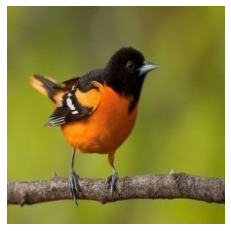

Image size + color channels: (224, 224, 3)


In [130]:
img = load_img("dataset/train/baltimore oriole/027.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

imgData = img_to_array(img)
shape = imgData.shape
print('Image size + color channels:', shape)

## Load and prepare images

In [135]:
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [138]:
training_set = train_datagen.flow_from_directory('dataset/train', target_size = (224, 224))
print(len(training_set))

test_set = test_datagen.flow_from_directory('dataset/test', target_size = (224, 224))
print(len(test_set))

valid_set = test_datagen.flow_from_directory('dataset/valid', target_size = (224, 224))
print(len(valid_set))

Found 35215 images belonging to 250 classes.
1101
Found 1250 images belonging to 250 classes.
40
Found 1250 images belonging to 250 classes.
40



### Train Model


In [159]:
classifier = Sequential()

# Step 1 - Convolution + MaxPooling layer
# Arguments: 32 filters, 3x3 kernel, relu activation
classifier.add(Conv2D(64, (3, 3), padding='same', input_shape = (224,224, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 2 - Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 250, activation = 'relu'))


In [160]:
classifier.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 110, 110, 32)      18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 96800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               24200250  
Total params: 24,220,506
Trainable params: 24,220,506
Non-trainable params: 0
__________________________________________

In [162]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [163]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from datetime import datetime

es = EarlyStopping(monitor='val_loss', patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

# Create a TensorBoard callback
logs = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir = logs,
                          histogram_freq = 1,
                          profile_batch = '500,520')

classifier.fit_generator(training_set,
                         steps_per_epoch = 250, # 8000 cases / 32 cases per batch (batch_size) = 250
                         epochs = 25, # play with number of epochs and benchmark results
                         callbacks = [es, mc, tensorboard],
                         validation_data = test_set,
                         validation_steps = 62, # 2000 cases / 32 cases per batch (batch_size) = 62.5
                         workers = 4) 

Epoch 1/25
 11/250 [>.............................] - ETA: 8:16 - loss: 0.1351 - accuracy: 0.0063

KeyboardInterrupt: 